In [1]:
import pandas as pd
import requests as rq
import seaborn as sns
from io import BytesIO
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np


In [2]:
# URL del archivo ZIP en GitHub
file_url = 'https://github.com/GuzmanManta/Data_Science/raw/refs/heads/main/smoking_driking_dataset_Ver01.7z'

# Descargar el archivo
response = rq.get(file_url)


In [3]:
# Guardar el archivo
with open('archivo.7z', 'wb') as f:
    f.write(response.content)

In [4]:
!pip install py7zr


In [5]:
import py7zr

In [6]:
# Extraer el contenido
with py7zr.SevenZipFile('archivo.7z', mode='r') as z:
    extracted_files = z.readall()

In [7]:
extracted_files

{'smoking_driking_dataset_Ver01.csv': <_io.BytesIO at 0x2931b908680>}

In [8]:
# Extraer el contenido y cargarlo en un DataFrame
with py7zr.SevenZipFile('archivo.7z', mode='r') as z:
    # Extraer el archivo CSV directamente
    file_content = z.read(['smoking_driking_dataset_Ver01.csv'])  # Usa el nombre del CSV
    df = pd.read_csv(BytesIO(file_content['smoking_driking_dataset_Ver01.csv'].read()))  # Leer el CSV en un DataFrame

df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

In [9]:
df['sex'].value_counts()/len(df)

sex
Male      0.53101
Female    0.46899
Name: count, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

No hay datos NULOS.

In [12]:
df.shape

(991346, 24)

In [13]:
estadisticas = df.describe()
df.describe()

age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.700000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP  ...      HDL_chole      LDL_chole  \
count  991346.000000  991346.000000  ...  991346.000000  991346.000000   
mean      122.432498      76.052627  ...      56.936800     113.037692   
std        14.543148       9.889365  ...      17.238479      35.842812   
min        67.000000      32.000000  ...       1.000000       1.000000   
25%       112.000000      70.000000  ...      46.000000      89.000000   
50%       120.000000      76.000000  ...      55.000000     111.000000   
75%       131.000000      82.000000  ...      66.000000     135.000000   
max       273.000000     185.000000  ...    8110.000000    5119.000000   

        triglyceride     hemoglobin  urine_protein  serum_creatinine  \
count  991346.000000  991346.000000  991346.000000     991346.000000   
mean      132.141751      14.229824       1.094224          0.860467   
std       102.196985       1.584929       0.437724          0.480530   
min         1.000000       1.000000       1.000000          0.100000   
25%        73.000000      13.200000       1.000000          0.700000   
50%       106.000000      14.300000       1.000000          0.800000   
75%       159.000000      15.400000       1.000000          1.000000   
max      9490.000000      25.000000       6.000000         98.000000   

            SGOT_AST       SGOT_ALT      gamma_GTP  SMK_stat_type_cd  
count  991346.000000  991346.000000  991346.000000     991346.000000  
mean       25.989308      25.755051      37.136347          1.608122  
std        23.493386      26.308599      50.424153          0.818507  
min         1.000000       1.000000       1.000000          1.000000  
25%        19.000000      15.000000      16.000000          1.000000  
50%        23.000000      20.000000      23.000000          1.000000  
75%        28.000000      29.000000      39.000000          2.000000  
max      9999.000000    7210.000000     999.000000          3.000000  

[8 rows x 22 columns]

In [14]:
estadisticas_p = df[['age','height','weight','HDL_chole','LDL_chole','hemoglobin','triglyceride']].describe()
estadisticas_p

age         height         weight      HDL_chole  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      56.936800   
std        14.181339       9.282957      12.514241      17.238479   
min        20.000000     130.000000      25.000000       1.000000   
25%        35.000000     155.000000      55.000000      46.000000   
50%        45.000000     160.000000      60.000000      55.000000   
75%        60.000000     170.000000      70.000000      66.000000   
max        85.000000     190.000000     140.000000    8110.000000   

           LDL_chole     hemoglobin   triglyceride  
count  991346.000000  991346.000000  991346.000000  
mean      113.037692      14.229824     132.141751  
std        35.842812       1.584929     102.196985  
min         1.000000       1.000000       1.000000  
25%        89.000000      13.200000      73.000000  
50%       111.000000      14.300000     106.000000  
75%       135.000000      15.400000     159.000000  
max      5119.000000      25.000000    9490.000000

In [15]:
df['check_chole'] =df['LDL_chole'] + df['HDL_chole'] + df['triglyceride']/5- df['tot_chole'] #aprox

In [16]:
df['check_chole'].sum()

838502.1999999994

In [17]:
df['check_chole'].sample(30) ## se cumple bastante por lo cual serían 4 variables que naturalmente tenderían a estar correlacionadas. Lo veremos cuando hagamos la matriz y reduzcamos dimensiones con PCA.

316974   -0.6
902218    0.0
976294   -0.8
666775    0.2
694869   -0.2
513739   -0.4
77138    -0.2
366060    0.2
132698    0.4
732024   -0.4
853434   -0.6
516807   -0.6
962323    0.2
56529    -0.8
714694   -0.4
632280   -0.2
81163     0.0
392384    0.0
316400    0.2
896909    0.4
807448   -0.2
817315   -0.4
480805   -0.2
800454   -0.2
314460    0.4
716915    0.0
653738    0.0
69354     0.0
545968    0.0
282042   -0.6
Name: check_chole, dtype: float64

In [18]:
df['SMK_stat_type_cd'].value_counts()/len(df)

SMK_stat_type_cd
1.0    0.607700
3.0    0.215822
2.0    0.176478
Name: count, dtype: float64

In [19]:
df['DRK_YN'].value_counts()/len(df)

DRK_YN
N    0.500187
Y    0.499813
Name: count, dtype: float64

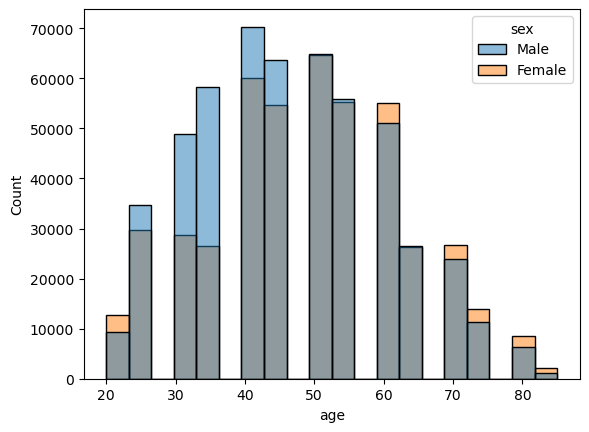

In [20]:
sns.histplot(df,x='age',hue='sex',bins=20);

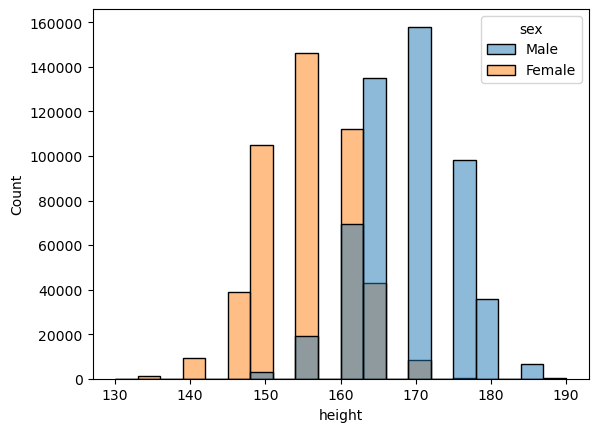

In [21]:
sns.histplot(df, x='height',hue='sex',bins=20);

In [22]:
sns.histplot(df, x='weight',hue='DRK_YN',bins=20); #"otro parecería" : los tomadores de alcohol tienen mayor peso por sobre los que no.

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(df, x='age',hue='DRK_YN',bins=15,palette='viridis')
plt.title("Distribución  Estado de Tomador por Edad")
plt.tight_layout()
plt.savefig("Distribución_Estado_Tomador_Edad.png"); #"otro parecería" : los tomadores de alcohol tienden a dismunir  a medida que su edad avanza. En el grupo de los 50 años es donde se hace el quiebre.

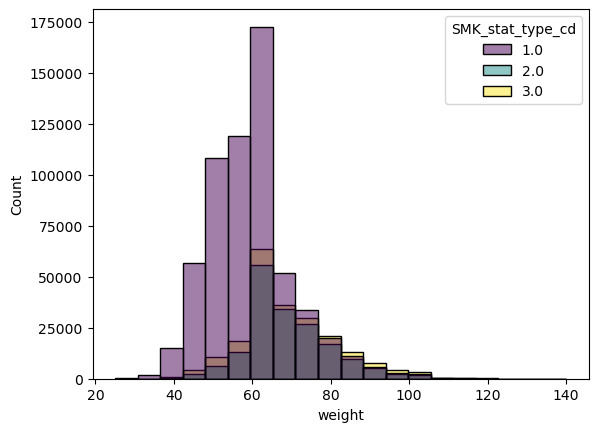

In [24]:
sns.histplot(df, x='weight',hue='SMK_stat_type_cd',bins=20,palette='viridis');
# 1=nunca fumó / 2=ex-fumador / 3=fumador activo
#"otro parecería" : los fumadores tienden a tener mayor peso. los pesos mas altos están en los fumadores, mas allá que el peso relativo en el total de la muestra sea mucho menor, lo que refuerza aún más esta primera aprox. .

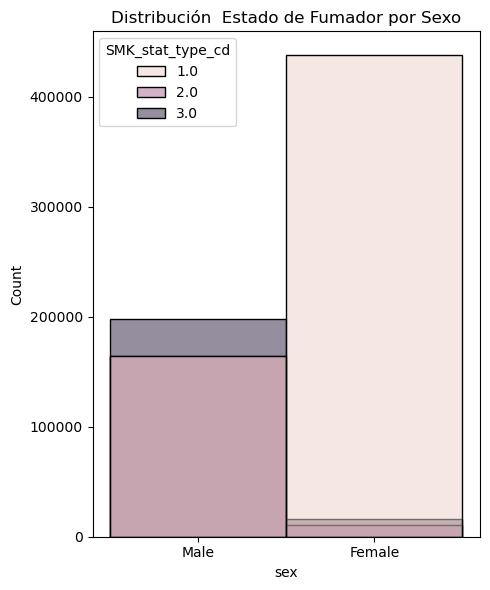

In [25]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.histplot(df, x='sex',hue='SMK_stat_type_cd',bins=2)
plt.title("Distribución  Estado de Fumador por Sexo")
plt.tight_layout()
plt.savefig("Distribución_Estado_Fumador_Sexo.png");

In [26]:
df.groupby('SMK_stat_type_cd')['sex'].value_counts()/len(df)*100


SMK_stat_type_cd  sex   
1.0               Female    44.158145
                  Male      16.611859
2.0               Male      16.545989
                  Female     1.101835
3.0               Male      19.943188
                  Female     1.638984
Name: count, dtype: float64

In [27]:
df.groupby('sex')['sex'].value_counts()

sex
Female    464931
Male      526415
Name: count, dtype: int64

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df, x='age',hue='SMK_stat_type_cd',bins=15,palette='viridis')
plt.title("Distribución  Estado de Fumador por Edad")
plt.tight_layout()
plt.savefig("Distribución_Estado_Fumador_Edad.png");
#no hay grandes observaciones. Contrario a lo que esperaba (que los mas chicos fumen menos pero la categ 3 nunca pasa la 1, mientras que en el punto anterior si.
#lo que sí podemos resaltar es que los ex fumadores pasan a los fumadores activos a partir de los 55 aprox lo cual puede deberse al tema de conciencia de la salud y daño que genera su adicción
#Políticas a nivel país que han desalentado el consumo. En UY particualrmente se hizo una campaña feroz en 2014 que bajó radicalmente el consumo de tabaco, tanto fue así que hoy en día las nuevas generaciones practicamente no consumen tabaco. Se consume mas marihuana que tabaco.

In [29]:
prom_peso_por_estado_smk=df.groupby('SMK_stat_type_cd')['weight']
prom_peso_por_estado_smk

In [30]:
prom_peso_por_estado_smk.mean()
#sin embargo el prom de peso es muy similar entre ex fumador y fumador vigente. Como comento más adelante, habría que ver desde cuándo fuma y cuánto hace que dejó.
#los que nunca fumaron sí parecen tener como 10k menos en promedio.

SMK_stat_type_cd
1.0    59.306272
2.0    69.406891
3.0    69.477808
Name: weight, dtype: float64

In [31]:
df.SMK_stat_type_cd.value_counts()

SMK_stat_type_cd
1.0    602441
3.0    213954
2.0    174951
Name: count, dtype: int64

In [32]:
df.SMK_stat_type_cd.value_counts()/len(df)*100 # 1=nunca fumó / 2=ex-fumador / 3=fumador activo

SMK_stat_type_cd
1.0    60.770004
3.0    21.582172
2.0    17.647824
Name: count, dtype: float64

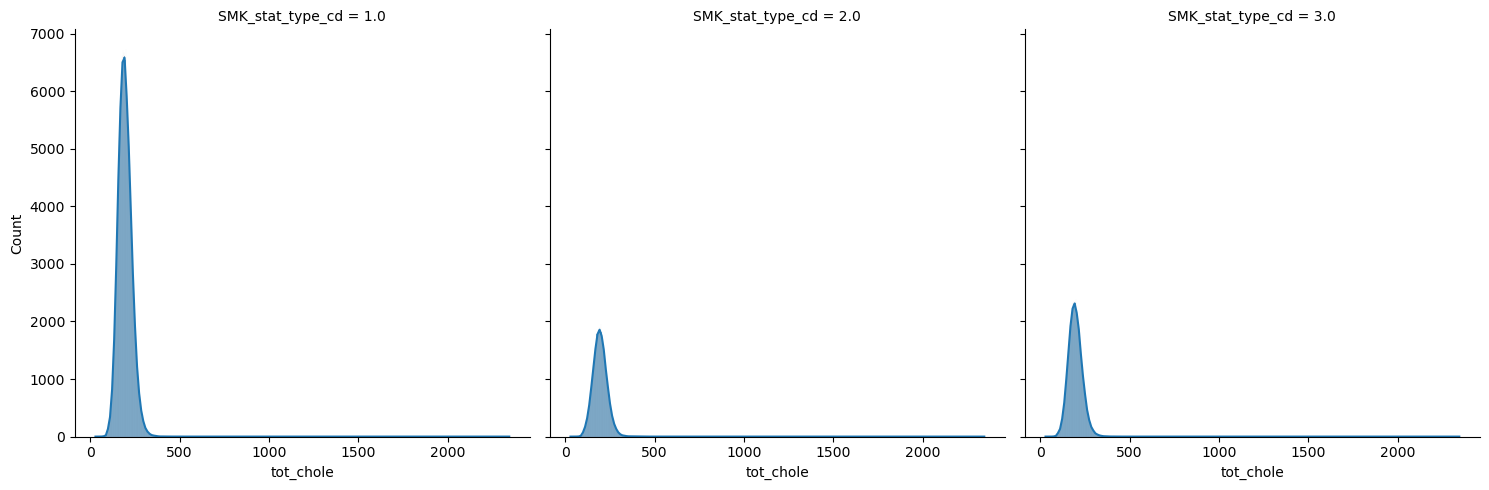

In [33]:
sns.displot(data=df,
           x="tot_chole",
           kde=True,
           kind='hist',
           col="SMK_stat_type_cd")
plt.savefig("Distribución_Coleterol_total_Estado_SMK.png");
#en principio, con estos datos, no pareceriera que el cigarro afectara directamente al colesterol. Las distribuciones son muy similares, mas allá que evidentemente la cantidad de fumadores en la muestra es mucho mayor (61%). Habría que ver dentro de este grupo cuánto hace que fuman pero lamentablemente no tengo esa info.

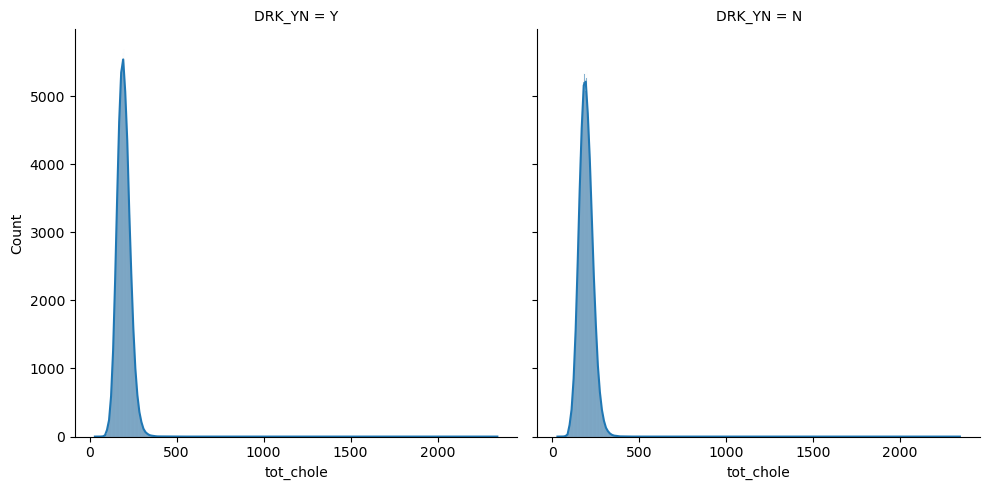

In [34]:
sns.displot(data=df,
           x="tot_chole",
            kde=True,
           kind='hist',
           col="DRK_YN")
plt.savefig("Distribución_Coleterol_total_Estado_DRK.png");

<Axes: xlabel='tot_chole', ylabel='weight'>

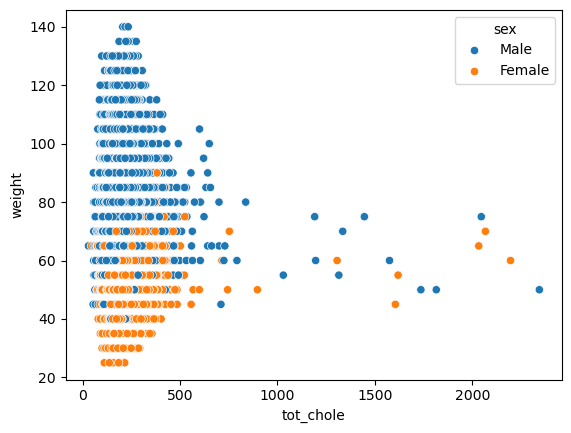

In [35]:
sns.scatterplot(df,y='weight',x='tot_chole', hue='sex')

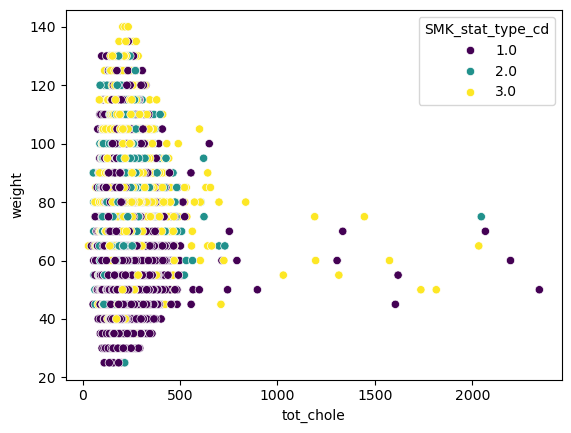

In [36]:
sns.scatterplot(df,y='weight',x='tot_chole', hue='SMK_stat_type_cd', palette='viridis');
#"raramente" o "reforzando" la primera aprox de que el cigarrillo o no cigarrillo, no está estricamente vinculado con el colesterol, de los 5 otulieres en cuanto a mayor colesterol, 3 nunca fumaron y 1 es ex fumador.
#obviamente volvemos a la consideración del tiempo que hace que fuma o que dejó y que la muestra tiene casi un 61% de nunca fumaron. Sin embargo, a pesar de todo, siguen apareciendo estas "tendencias".

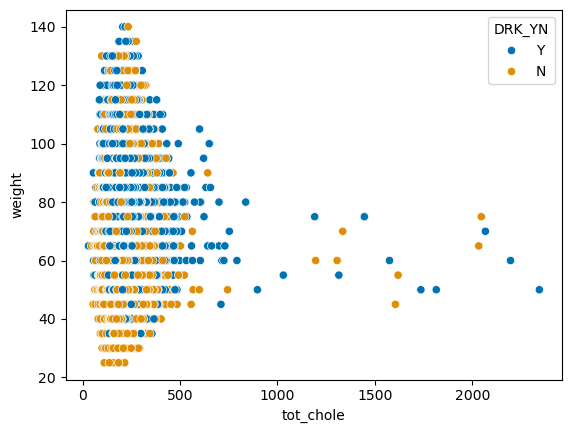

In [37]:
sns.scatterplot(df,y='weight',x='tot_chole', hue='DRK_YN', palette='colorblind');
#contrario a lo anterior, aquí si los 3 con mayor colesterol son tomadores de alcohol. A partir de esto buscamos intentaremos descubrir cuál de las dos drogas inciden más en en el colesterol.
#Según lo informado por las especialistas en la materia, el cigarrillo incide más directamente que el alcohol en el aumento del colesterol pues aumenta el malo ("LDL") y reduce el bueno ("HDL"), mientras que el alcohol en exceso solo aumentaría el malo ("LDL").
#Sin embargo, mis primeras aproximaciones estarían indicando lo contrario, por lo cual me propongo buscar empírica y tratar de modelar la variable colesterol (variable target).

In [38]:
plt.figure(figsize=(12, 10))

# Límites
lower_limit_hdl = 0
upper_limit_hdl = 8110 / 10  
lower_limit_ldl = 0
upper_limit_ldl = 5119 / 10

# Gráfico de colesterol HDL por estado de fumador
plt.subplot(2, 2, 1)
sns.violinplot(data=df, x='SMK_stat_type_cd', y='HDL_chole', scale="width")
plt.title('Colesterol HDL por Estado de Fumador')
plt.ylabel('Colesterol HDL ("bueno")')
plt.ylim(lower_limit_hdl, upper_limit_hdl)

# Gráfico de colesterol LDL por estado de fumador
plt.subplot(2, 2, 2)
sns.violinplot(data=df, x='SMK_stat_type_cd', y='LDL_chole', scale="width")
plt.title('Colesterol LDL por Estado de Fumador')
plt.ylabel('Colesterol LDL ("malo")')
plt.ylim(lower_limit_ldl, upper_limit_ldl)

# Gráfico de colesterol HDL por estado de tomador
plt.subplot(2, 2, 3)
sns.violinplot(data=df, x='DRK_YN', y='HDL_chole', scale='width')
plt.title('Colesterol HDL por Estado de Tomador')
plt.ylabel('Colesterol HDL ("bueno")')
plt.ylim(lower_limit_hdl, upper_limit_hdl)

# Gráfico de colesterol LDL por estado de tomador
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='DRK_YN', y='LDL_chole', scale='width')
plt.title('Colesterol LDL por Estado de Tomador')
plt.ylabel('Colesterol LDL ("malo")')
plt.ylim(lower_limit_ldl, upper_limit_ldl)

# Ajustar el layout
plt.tight_layout()
plt.show();


C:\Users\guzma\AppData\Local\Temp\ipykernel_15540\4084311889.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='SMK_stat_type_cd', y='HDL_chole', scale="width")
C:\Users\guzma\AppData\Local\Temp\ipykernel_15540\4084311889.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='SMK_stat_type_cd', y='LDL_chole', scale="width")
C:\Users\guzma\AppData\Local\Temp\ipykernel_15540\4084311889.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='DRK_YN', y='HDL_chole', scale='width')
C:\Users\guzma\AppData\Local\Temp\ipykernel_15540\4084311889.py:32: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [40]:
df['DRK_YN'] = df['DRK_YN'].str.strip()

In [41]:
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})
df['DRK_YN']

0         1
1         0
2         0
3         0
4         0
         ..
991341    0
991342    0
991343    1
991344    0
991345    1
Name: DRK_YN, Length: 991346, dtype: int64

In [42]:
df['sex'] = df['sex'].str.strip()

In [43]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [44]:
df['sex']

0         1
1         1
2         1
3         1
4         1
         ..
991341    1
991342    1
991343    0
991344    1
991345    1
Name: sex, Length: 991346, dtype: int64

In [45]:
correlacion = df['SMK_stat_type_cd'].corr(df['sex'])

print(f"La correlación entre SMK_stat_type_cd y sex es: {correlacion}")

La correlación entre SMK_stat_type_cd y sex es: 0.591004049554285


In [46]:
#matriz de correlaciones
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

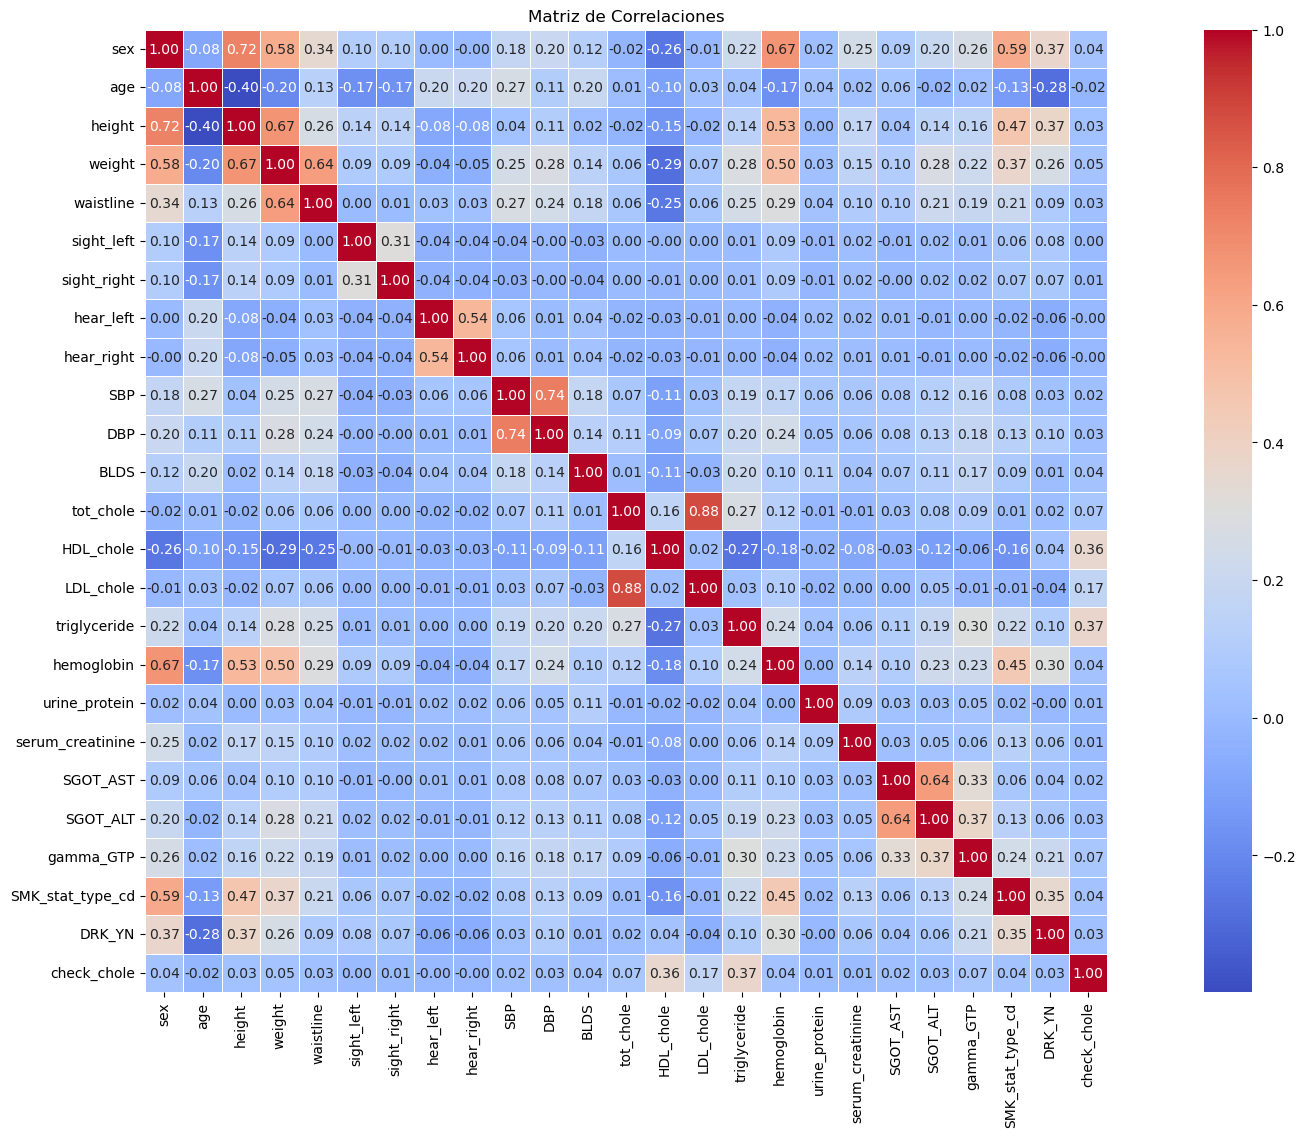

In [47]:
# Crear el heatmap
plt.figure(figsize=(25, 12.5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Agregar título
plt.title('Matriz de Correlaciones')
plt.show()

In [48]:
# Creamos una máscara para ocultar la parte superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Mapa de calor de Correlaciones (Parte Inferior)")

plt.savefig("Matriz_correlacion.png");

In [49]:
#continunado con el análisis de las variables, en este caso individualmente, medimos:
# Asimetría: mide la simetría de la distribución (>0 cola a la derecha, <0 cola a la izq, 0 simétrica)
# Curtosis: mide la forma y el peso de las colas de la distribución.
asimetria = skew(numeric_df)
curtosis = kurtosis(numeric_df)

In [50]:
asimetria

array([-1.24280712e-01,  1.53653155e-01, -2.27371360e-02,  5.76555726e-01,
        2.67883992e+01,  9.99461085e+00,  1.00336318e+01,  5.36507596e+00,
        5.46300484e+00,  4.82059589e-01,  4.00033194e-01,  4.61737047e+00,
        1.55687937e+00,  1.04577477e+02,  5.25173143e+00,  6.52936297e+00,
       -3.83987219e-01,  5.67248221e+00,  1.11021890e+02,  1.50491462e+02,
        5.00387966e+01,  7.71849762e+00,  8.31426986e-01,  7.46459916e-04,
        4.92538594e+02])

In [51]:
# lo mostramos en un df para que se vea cual corresponde a qué columna:
asimetria_df = pd.DataFrame(asimetria, index=numeric_df.columns, columns=['Asimetría'])
curtosis_df = pd.DataFrame(curtosis, index=numeric_df.columns, columns=['Curtosis'])
join_asim_curt_df = asimetria_df.join(curtosis_df)
join_asim_curt_df.sort_values(by=['Asimetría'],ascending=True)

Asimetría       Curtosis
hemoglobin         -0.383987       0.711370
sex                -0.124281      -1.984554
height             -0.022737      -0.535644
DRK_YN              0.000746      -1.999999
age                 0.153653      -0.575619
DBP                 0.400033       0.891493
SBP                 0.482060       0.996628
weight              0.576556       0.359212
SMK_stat_type_cd    0.831427      -1.000834
tot_chole           1.556879      49.462130
BLDS                4.617370      40.470277
LDL_chole           5.251731     481.280548
hear_left           5.365076      26.784040
hear_right          5.463005      27.844422
urine_protein       5.672482      36.899359
triglyceride        6.529363     175.384352
gamma_GTP           7.718498      97.041640
sight_left          9.994611     144.948942
sight_right        10.033632     145.921804
waistline          26.788399    2066.801765
SGOT_ALT           50.038797    8615.900820
HDL_chole         104.577477   48093.912635
serum_creatinine  111.021890   19089.733465
SGOT_AST          150.491462   50432.396378
check_chole       492.538594  378604.297189

In [52]:
#Determinamos los outliers a través de la regla del rango intercuartílico para cada columna del df.
# Función para detectar outliers
def detectar_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (data < limite_inferior) | (data > limite_superior)
# Crear un diccionario para almacenar la cantidad de outliers
outliers_count = {}

# Aplicar la función y contar los outliers por columna
for column in numeric_df.columns:
    outliers = numeric_df[column][detectar_outliers_iqr(numeric_df[column])]
    outliers_count[column] = outliers.count()  # Contar los outliers

# Mostrar el resultado
print("Cantidad de outliers por columna:")
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")


Cantidad de outliers por columna:
sex: 0 outliers
age: 0 outliers
height: 86 outliers
weight: 19221 outliers
waistline: 4417 outliers
sight_left: 11582 outliers
sight_right: 10495 outliers
hear_left: 31222 outliers
hear_right: 30212 outliers
SBP: 15836 outliers
DBP: 13122 outliers
BLDS: 64202 outliers
tot_chole: 11298 outliers
HDL_chole: 13858 outliers
LDL_chole: 10098 outliers
triglyceride: 54104 outliers
hemoglobin: 9760 outliers
urine_protein: 56171 outliers
serum_creatinine: 8005 outliers
SGOT_AST: 67614 outliers
SGOT_ALT: 72928 outliers
gamma_GTP: 94142 outliers
SMK_stat_type_cd: 0 outliers
DRK_YN: 0 outliers
check_chole: 52818 outliers


In [53]:
outliers_=pd.Series(outliers_count)
outliers_.sort_values(ascending=False)

gamma_GTP           94142
SGOT_ALT            72928
SGOT_AST            67614
BLDS                64202
urine_protein       56171
triglyceride        54104
check_chole         52818
hear_left           31222
hear_right          30212
weight              19221
SBP                 15836
HDL_chole           13858
DBP                 13122
sight_left          11582
tot_chole           11298
sight_right         10495
LDL_chole           10098
hemoglobin           9760
serum_creatinine     8005
waistline            4417
height                 86
age                     0
SMK_stat_type_cd        0
DRK_YN                  0
sex                     0
dtype: int64

In [54]:
outliers_.sort_values(ascending=False)/len(df)

gamma_GTP           0.094964
SGOT_ALT            0.073565
SGOT_AST            0.068204
BLDS                0.064762
urine_protein       0.056661
triglyceride        0.054576
check_chole         0.053279
hear_left           0.031495
hear_right          0.030476
weight              0.019389
SBP                 0.015974
HDL_chole           0.013979
DBP                 0.013237
sight_left          0.011683
tot_chole           0.011397
sight_right         0.010587
LDL_chole           0.010186
hemoglobin          0.009845
serum_creatinine    0.008075
waistline           0.004456
height              0.000087
age                 0.000000
SMK_stat_type_cd    0.000000
DRK_YN              0.000000
sex                 0.000000
dtype: float64

In [55]:
desviaciones_estandar = estadisticas.loc['std']
desviaciones_estandar.sort_values(ascending=False)

triglyceride        102.196985
gamma_GTP            50.424153
tot_chole            38.660155
LDL_chole            35.842812
SGOT_ALT             26.308599
BLDS                 24.179960
SGOT_AST             23.493386
HDL_chole            17.238479
SBP                  14.543148
age                  14.181339
weight               12.514241
waistline            11.850323
DBP                   9.889365
height                9.282957
hemoglobin            1.584929
SMK_stat_type_cd      0.818507
sight_left            0.605949
sight_right           0.604774
serum_creatinine      0.480530
urine_protein         0.437724
hear_left             0.174650
hear_right            0.171892
Name: std, dtype: float64

In [56]:
df_copy_m = df.copy() ##para hacer melt

<Axes: xlabel='sex', ylabel='hemoglobin'>

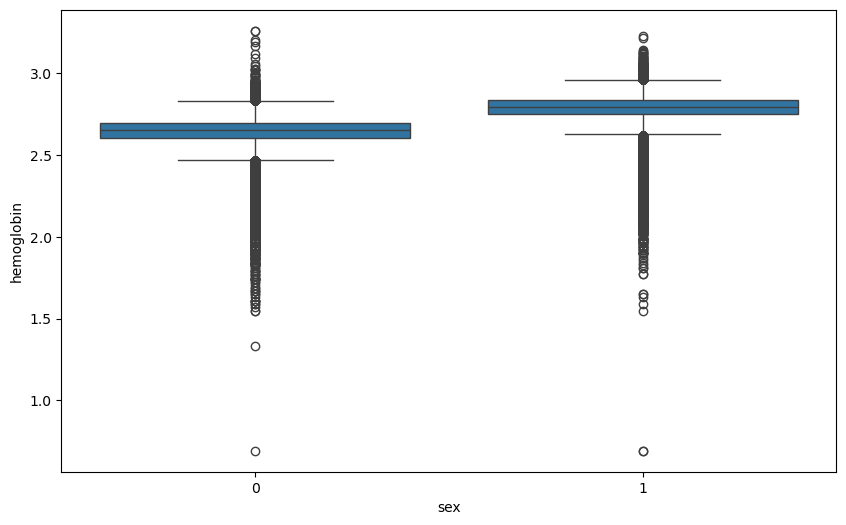

In [57]:
df_copy_m['hemoglobin'] = np.log1p(df_copy_m['hemoglobin'])
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_copy_m, x='sex', y='hemoglobin') # 0 - Fenake / 1 - Male

<Axes: xlabel='sex', ylabel='triglyceride'>

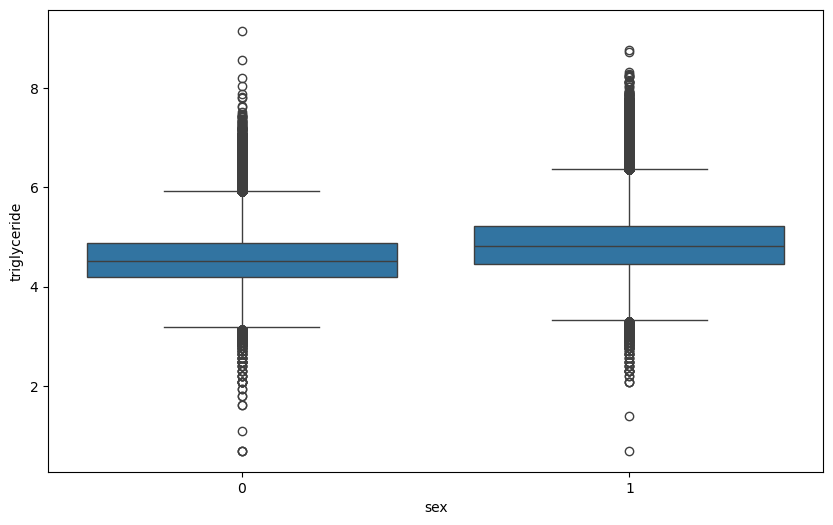

In [58]:
df_copy_m['triglyceride'] = np.log1p(df_copy_m['triglyceride'])
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_copy_m, x='sex', y='triglyceride') #0 - Fenake / 1 - Male

<Axes: xlabel='sex', ylabel='gamma_GTP'>

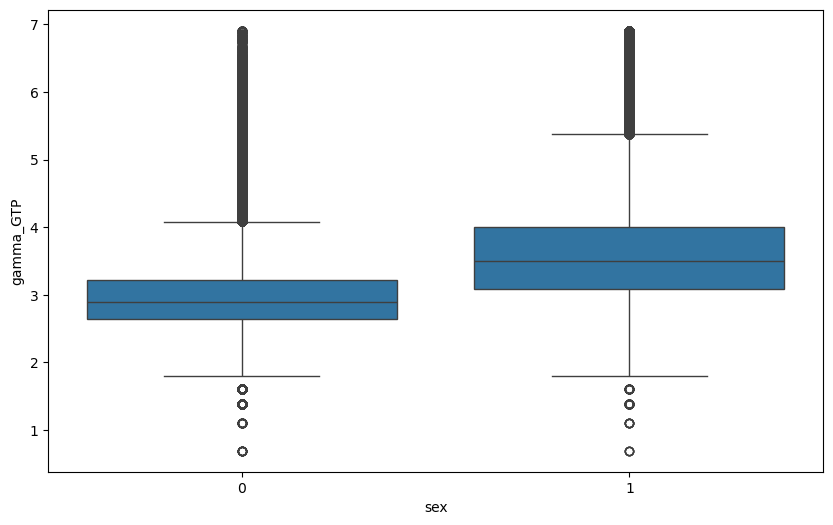

In [59]:
df_copy_m['gamma_GTP'] = np.log1p(df_copy_m['gamma_GTP'])
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_copy_m, x='sex', y='gamma_GTP')
#la gran mayoría de los atípicos esán por encima del límite superior. No hay muchos atípicos por debajo del límite inferior (a diferencia de los otros dos).
#0 - Fenake / 1 - Male

In [60]:
# Aplicar la función y mostrar solo los outliers por columna
for column in numeric_df.columns:
    outliers = numeric_df[column][detectar_outliers_iqr(numeric_df[column])]
    if not outliers.empty:
        print(f"Outliers en {column}:")
        print(outliers.dropna())
        print()  # Línea en blanco para mejor legibilidad

Outliers en height:
29250     130
40943     130
42173     130
44767     130
61199     130
         ... 
874945    130
877028    130
902184    130
928214    130
936627    130
Name: height, Length: 86, dtype: int64

Outliers en weight:
108        95
133       120
283        95
294       105
450       100
         ... 
991043     95
991045     95
991121    100
991215     95
991285    120
Name: weight, Length: 19221, dtype: int64

Outliers en waistline:
89        110.0
101       109.0
133       110.0
294       114.0
450       110.8
          ...  
989889    112.0
989970    110.1
990495     51.0
990852    115.0
991285    117.0
Name: waistline, Length: 4417, dtype: float64

Outliers en sight_left:
76        9.9
197       2.0
213       2.0
283       2.0
322       9.9
         ... 
990873    9.9
990888    2.0
991092    9.9
991129    9.9
991160    2.0
Name: sight_left, Length: 11582, dtype: float64

Outliers en sight_right:
11        9.9
76        9.9
213       2.0
394       9.9
403       9.9
 

In [61]:
# Usando melt para convertir el DataFrame en un formato largo (y poder en un mismo grafico poner todos los valores de encimas, abierto por si toma o no, o si fuma, fumó y dejó o nunca fumó)
df_melted = df_copy_m.melt(id_vars=['DRK_YN', 'SMK_stat_type_cd'], 
                    value_vars=['SGOT_ALT', 'SGOT_AST', 'gamma_GTP'], 
                    var_name='Measure', 
                    value_name='Value UI/lt')
df_melted

DRK_YN  SMK_stat_type_cd    Measure  Value UI/lt
0             1               1.0   SGOT_ALT    35.000000
1             0               3.0   SGOT_ALT    36.000000
2             0               1.0   SGOT_ALT    32.000000
3             0               1.0   SGOT_ALT    34.000000
4             0               1.0   SGOT_ALT    12.000000
...         ...               ...        ...          ...
2974033       0               1.0  gamma_GTP     3.332205
2974034       0               1.0  gamma_GTP     2.772589
2974035       1               3.0  gamma_GTP     2.890372
2974036       0               1.0  gamma_GTP     2.890372
2974037       1               3.0  gamma_GTP     3.610918

[2974038 rows x 4 columns]

In [62]:
df_copy_m['hemogoblin_milígramos'] = df_copy_m['hemoglobin']/1000

In [63]:
df.groupby('SMK_stat_type_cd')['LDL_chole'].sum()

SMK_stat_type_cd
1.0    68295200.0
2.0    19740891.0
3.0    24023373.0
Name: LDL_chole, dtype: float64

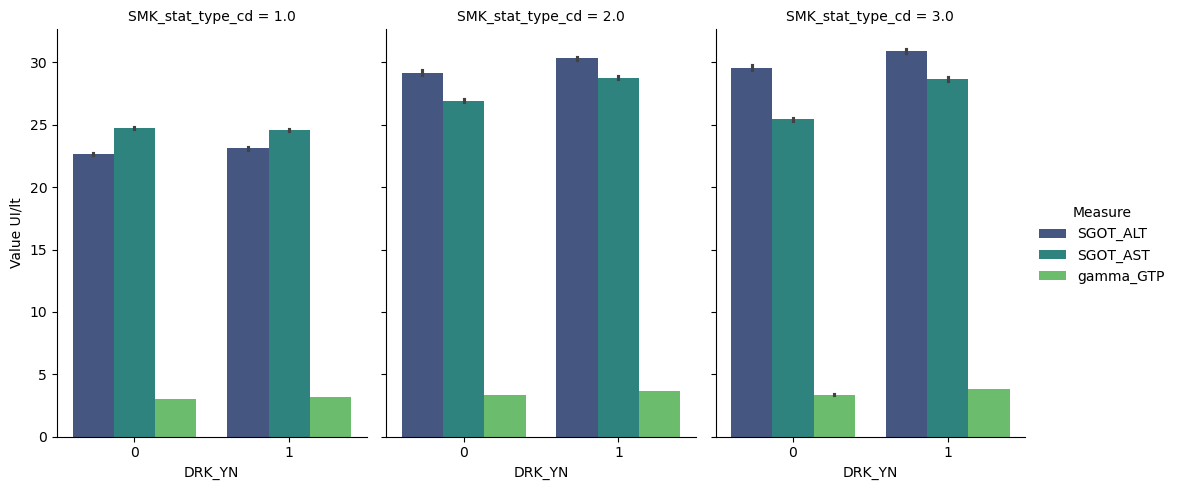

In [64]:
g = sns.catplot(data=df_melted,
            y='Value UI/lt',
            x='DRK_YN',
            hue='Measure',
            kind='bar',
            col='SMK_stat_type_cd',  
            height=5,
            aspect=0.7,
           palette='viridis');

In [65]:
df_melted1 = df_copy_m.melt(id_vars=['DRK_YN', 'SMK_stat_type_cd'], 
                    value_vars=['LDL_chole','HDL_chole', 'triglyceride', 'serum_creatinine','hemogoblin_milígramos','BLDS'], 
                    var_name='Measure', 
                    value_name='Value mg/dl')

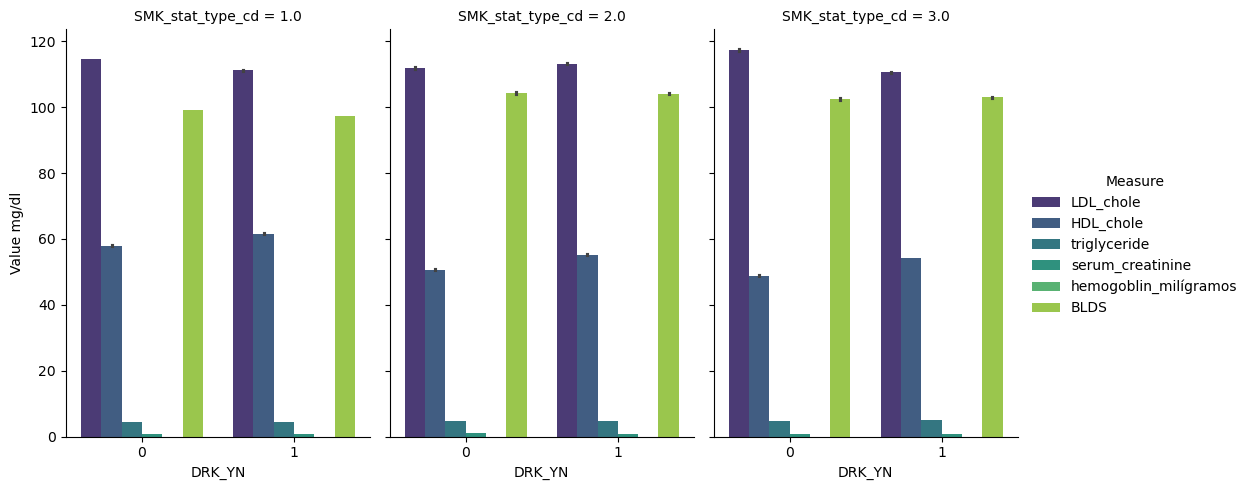

In [66]:
g = sns.catplot(data=df_melted1,
            y='Value mg/dl',
            x='DRK_YN',
            hue='Measure',
            kind='bar',
            col='SMK_stat_type_cd',  
            height=5,
            aspect=0.7,
           palette='viridis')
plt.savefig("valores_varios_SMK_1.png");

In [67]:
#cálculo del IMC
df['height_m'] = df['height'] / 100
df['IMC'] = df['weight'] / (df['height_m'] ** 2)
df.head(5)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  urine_protein  serum_creatinine  SGOT_AST  \
0         1.0  120.0  ...            1.0               1.0      21.0   
1         1.0  130.0  ...            1.0               0.9      20.0   
2         1.0  120.0  ...            1.0               0.9      47.0   
3         1.0  145.0  ...            1.0               1.1      29.0   
4         1.0  138.0  ...            1.0               0.8      19.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  check_chole  height_m  \
0      35.0       40.0               1.0       1         -0.6      1.70   
1      36.0       27.0               3.0       0         -0.8      1.80   
2      32.0       68.0               1.0       0         -0.2      1.65   
3      34.0       18.0               1.0       0          0.2      1.75   
4      12.0       25.0               1.0       0         -0.2      1.65   

         IMC  
0  25.951557  
1  24.691358  
2  27.548209  
3  26.122449  
4  22.038567  

[5 rows x 27 columns]

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df, x='IMC',hue='SMK_stat_type_cd',bins=10,palette='viridis')
plt.title("Distribución  Estado de Fumador por IMC")
plt.tight_layout()
plt.savefig("IMC_Fumador.png");

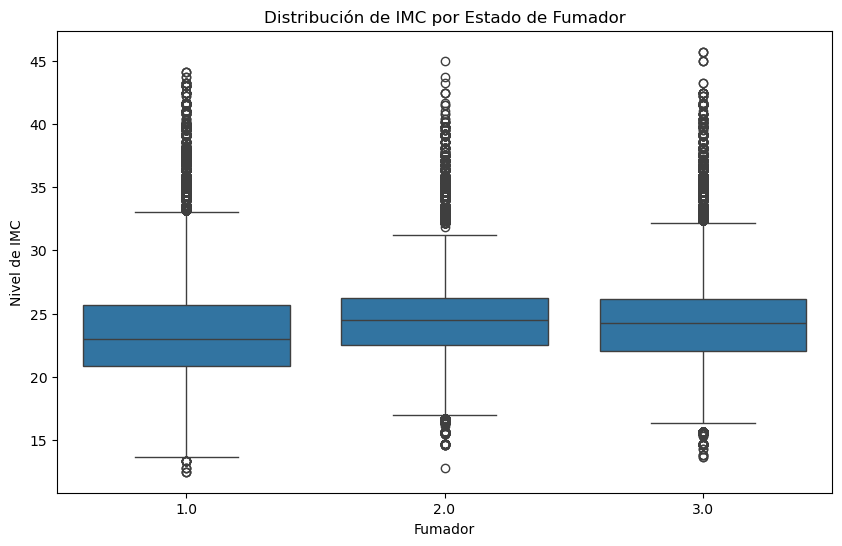

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SMK_stat_type_cd', y='IMC', data=df)
plt.title('Distribución de IMC por Estado de Fumador')
plt.xlabel('Fumador')
plt.ylabel('Nivel de IMC');
plt.show()

In [70]:
correlacion = df['IMC'].corr(df['SMK_stat_type_cd'])

print("La correlación entre IMC y SMK_stat_type_cd es:", correlacion)

La correlación entre IMC y SMK_stat_type_cd es: 0.12555516784423312


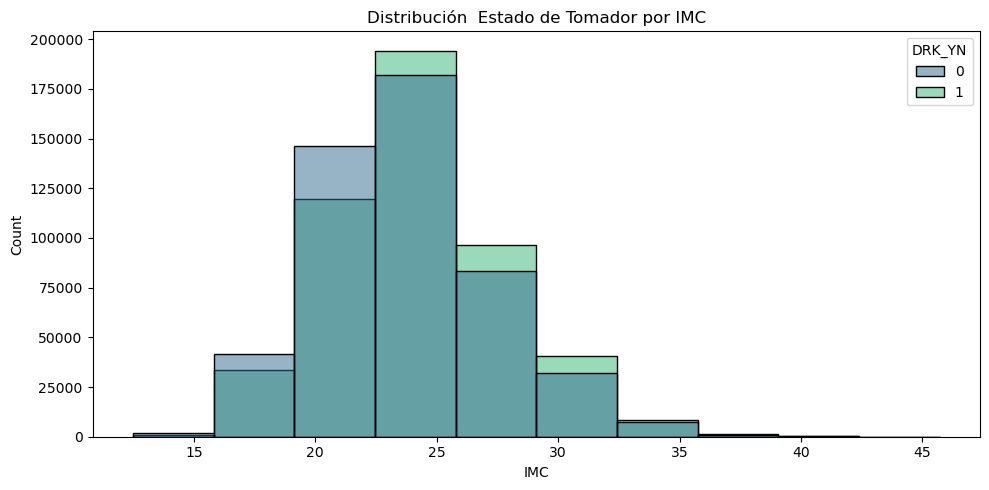

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df, x='IMC',hue='DRK_YN',bins=10, palette="viridis")
plt.title("Distribución  Estado de Tomador por IMC") #'Y': 1, 'N': 0
plt.tight_layout()
plt.savefig("IMC_Tomador.png");

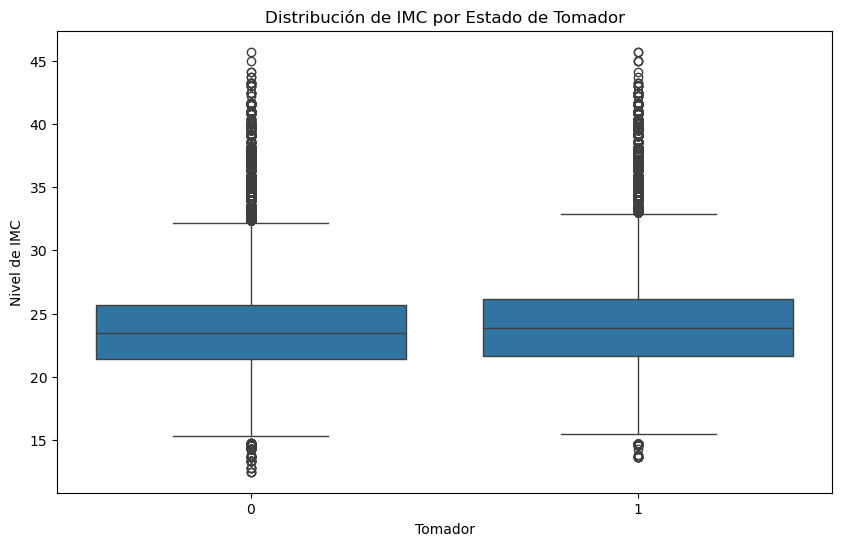

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DRK_YN', y='IMC', data=df)
plt.title('Distribución de IMC por Estado de Tomador')#'Y': 1, 'N': 0
plt.xlabel('Tomador')
plt.ylabel('Nivel de IMC')
plt.show()

In [73]:
correlacion = df['IMC'].corr(df['DRK_YN'])

print("La correlación entre IMC y DRK_YN es:", correlacion)

La correlación entre IMC y DRK_YN es: 0.06029761963973665


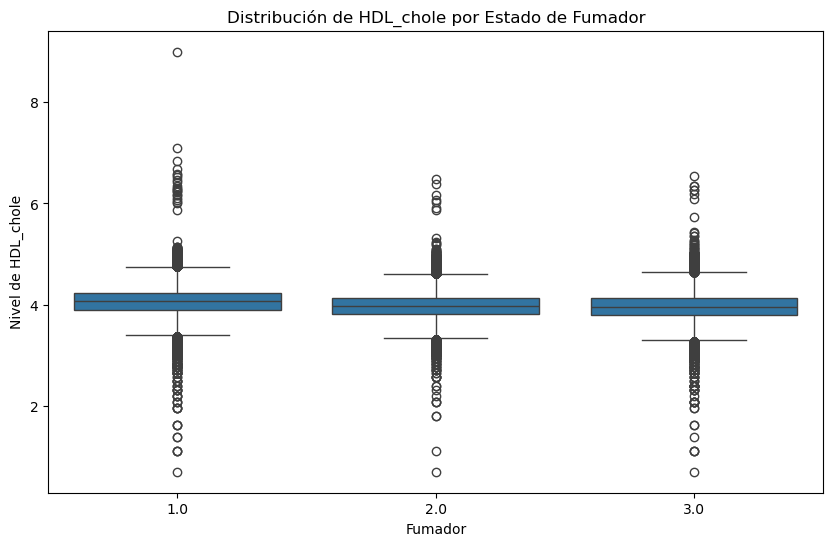

In [74]:
#HDL bajo en fumadores:
df_copy_m['HDL_chole'] = np.log1p(df_copy_m['HDL_chole'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='SMK_stat_type_cd', y='HDL_chole', data=df_copy_m)
plt.title('Distribución de HDL_chole por Estado de Fumador') 
plt.xlabel('Fumador')
plt.ylabel('Nivel de HDL_chole')
plt.savefig("HDL_fumador.png")
plt.show();

In [75]:
correlacion = df['HDL_chole'].corr(df['SMK_stat_type_cd'])

print("La correlación entre HDL_chole y SMK_stat_type_cd es:", correlacion)

La correlación entre HDL_chole y SMK_stat_type_cd es: -0.16103082916436792


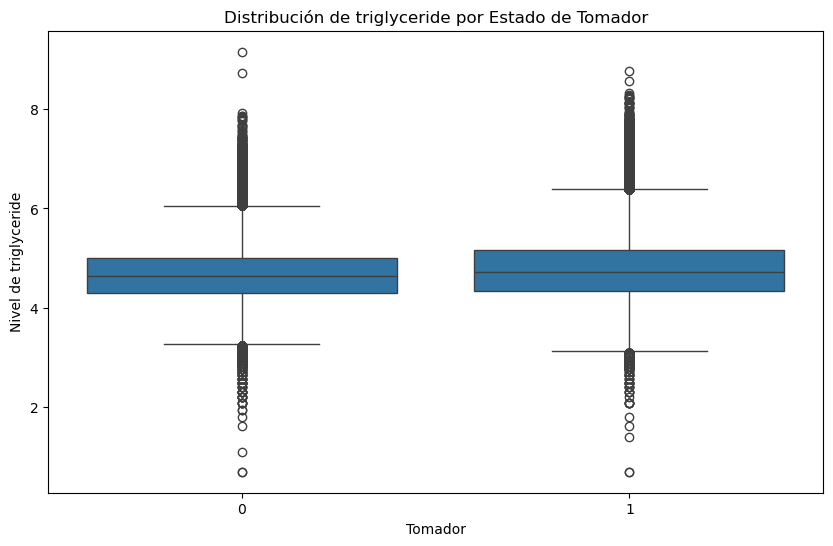

In [76]:
#Triglicéridos altos en tomadores:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DRK_YN', y='triglyceride', data=df_copy_m)
plt.title('Distribución de triglyceride por Estado de Tomador') #'Y': 1, 'N': 0
plt.xlabel('Tomador')
plt.ylabel('Nivel de triglyceride')
plt.savefig("trig_tomador.png")
plt.show();

In [77]:
correlacion = df['triglyceride'].corr(df['DRK_YN'])

print("La correlación entre triglyceride y DRK_YN es:", correlacion)

La correlación entre triglyceride y DRK_YN es: 0.10439794677977464


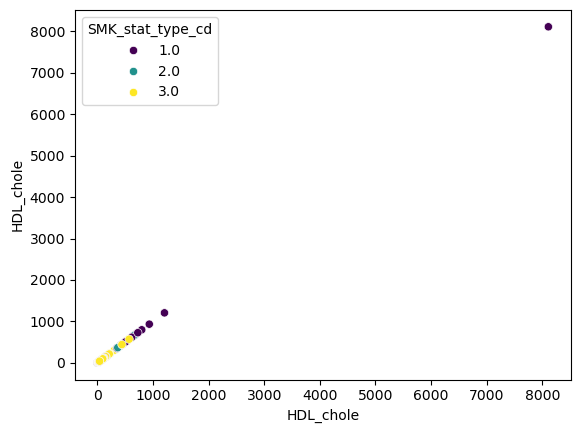

In [78]:
#probamos con scatter haciendo  HDL_chole Vs HDL_chole abiertos por SMK_type simplemente para verlos distribuidos en el espacio por categoría y parecería que
# los activos tienen el HDL mas bajo. Al menos la mancha amarilla que invade el espacio lo hace más cerca de los origenes de los ejes (valores mas bajas).
sns.scatterplot(df,y='HDL_chole',x='HDL_chole', hue='SMK_stat_type_cd', palette='viridis')
plt.savefig("scatter_chole_smk.jpg");


In [79]:
df.groupby('SMK_stat_type_cd')['HDL_chole'].agg(['mean', 'max', 'min', 'std'])
#claramente podemos notar que el 8110 tiene que estar mal. Mal la unidad de medida quizá pero parece muchísimo que una persona pueda tener de HDL_chole 8110 mg/dl 

mean     max  min        std
SMK_stat_type_cd                                   
1.0               59.258090  8110.0  1.0  18.575792
2.0               53.824900   658.0  1.0  14.013259
3.0               52.945241   697.0  1.0  14.342354

In [80]:
# ubiquemos el 8110 en el dataset:
fila = df[df['HDL_chole'] == 8110]
print(fila)

      sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
7075    0   20     160      55       67.0         0.3          0.5        1.0   

      hear_right    SBP  ...  urine_protein  serum_creatinine  SGOT_AST  \
7075         1.0  105.0  ...            1.0               0.8      21.0   

      SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  check_chole  height_m  \
7075      15.0       18.0               1.0       0      13508.0       1.6   

            IMC  
7075  21.484375  

[1 rows x 27 columns]


In [81]:
df.loc[7075] ## lo que es peso, altura, cintura, IMC están dentro de los rangos normales. Es jóven, no toma ni fuma, por lo cual allí debe de haber un error de tipeo (o de unidad de medida)

sex                     0.000000
age                    20.000000
height                160.000000
weight                 55.000000
waistline              67.000000
sight_left              0.300000
sight_right             0.500000
hear_left               1.000000
hear_right              1.000000
SBP                   105.000000
DBP                    70.000000
BLDS                   83.000000
tot_chole            1619.000000
HDL_chole            8110.000000
LDL_chole            5119.000000
triglyceride         9490.000000
hemoglobin             14.000000
urine_protein           1.000000
serum_creatinine        0.800000
SGOT_AST               21.000000
SGOT_ALT               15.000000
gamma_GTP              18.000000
SMK_stat_type_cd        1.000000
DRK_YN                  0.000000
check_chole         13508.000000
height_m                1.600000
IMC                    21.484375
Name: 7075, dtype: float64

In [82]:
#calculemos nuevamente los valores sin contemplar este "atípico".
df_filtrado = df.drop(index=7075)
df_filtrado.groupby('SMK_stat_type_cd')['HDL_chole'].agg(['mean', 'max', 'min', 'std'])

mean     max  min        std
SMK_stat_type_cd                                   
1.0               59.244726  1206.0  1.0  15.410182
2.0               53.824900   658.0  1.0  14.013259
3.0               52.945241   697.0  1.0  14.342354

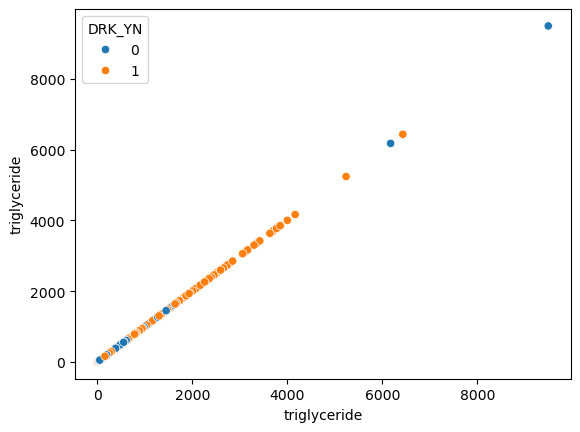

In [83]:
sns.scatterplot(df,y='triglyceride',x='triglyceride', hue='DRK_YN')
plt.savefig("scatter_trig_dk.jpg");


In [84]:
fila1 = df[df['triglyceride'] == 6173]
fila1

sex  age  height  weight  waistline  sight_left  sight_right  \
220459    1   40     165      90      103.0         1.2          1.5   

        hear_left  hear_right    SBP  ...  urine_protein  serum_creatinine  \
220459        1.0         1.0  118.0  ...            1.0               0.6   

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  check_chole  \
220459      26.0      43.0      169.0               3.0       0        708.6   

        height_m        IMC  
220459      1.65  33.057851  

[1 rows x 27 columns]

In [85]:
df.groupby('DRK_YN')['triglyceride'].agg(['mean', 'max', 'min', 'std'])

mean     max  min         std
DRK_YN                                     
0       121.476582  9490.0  1.0   81.591334
1       142.814884  6430.0  1.0  118.348653

In [86]:
df_filtrado.groupby('DRK_YN')['triglyceride'].agg(['mean', 'max', 'min', 'std'])

mean     max  min         std
DRK_YN                                     
0       121.457688  6173.0  1.0   80.499400
1       142.814884  6430.0  1.0  118.348653

In [87]:
#1) Analizar la relación entre el género y edad con  el consumo de tabaco y alcohol respectivamente.
# Para el consumo de alcohol
X_alcohol = df[['age']]  
y_alcohol = df['DRK_YN']

# Para el consumo de tabaco
X_smoke = df[['sex']]  
y_smoke = df['SMK_stat_type_cd']

In [88]:
df['SMK_stat_type_cd'].value_counts()

SMK_stat_type_cd
1.0    602441
3.0    213954
2.0    174951
Name: count, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

# Dividir para el consumo de alcohol
X_train_alcohol, X_test_alcohol, y_train_alcohol, y_test_alcohol = train_test_split(X_alcohol, y_alcohol, test_size=0.2, random_state=42)

# Dividir para el consumo de tabaco
X_train_smoke, X_test_smoke, y_train_smoke, y_test_smoke = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=42)


Compararemos distitnos modelos de aprendizaje No supervisado para variables discretas para saber cual es el que mejor se adapta a efectos de explicar la variable target . En este caso lo haremos solo para predecir el consumo de alcohol.

In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier



In [93]:
# Definir varios modelos
models = {
    'Random Forest': RandomForestClassifier(), 
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost':xgb.XGBClassifier()
}

In [94]:
# Usamos cross_val_score para evaluar los modelos con validación cruzada (con 3 pliegues), utilizamos accuracy para evaluar por ser discreta.
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train_alcohol, y_train_alcohol, cv=3, scoring='accuracy') 
    results[name] = cv_results
    print(f'{name}: {cv_results.mean()} ± {cv_results.std()}')

Random Forest: 0.6224081923201678 ± 0.0008031760037249867
KNN: 0.5260239730477598 ± 0.008381001618979067
Logistic Regression: 0.6224081923201678 ± 0.0008031760037249867
Decision Tree: 0.6224081923201678 ± 0.0008031760037249867
XGBoost: 0.6224081923201678 ± 0.0008031760037249867


In [95]:
models1 = {
    'Random Forest1': RandomForestClassifier(n_estimators=500,max_depth=8), 
    'Logistic Regression1': LogisticRegression(max_iter=500),
    'Random Forest2': RandomForestClassifier(n_estimators=300,max_depth=6),
    'KNN2':KNeighborsClassifier(5),
}

In [96]:
# Usamos cross_val_score para evaluar los modelos con validación cruzada (con 3 pliegues), utilizamos accuracy para evaluar por ser discreta.
results1 = {}
for name, model in models1.items():
    cv_results1 = cross_val_score(model, X_train_alcohol, y_train_alcohol, cv=3, scoring='accuracy') 
    results1[name] = cv_results1
    print(f'{name}: {cv_results1.mean()} ± {cv_results1.std()}')

Random Forest1: 0.6224081923201678 ± 0.0008031760037249867
Logistic Regression1: 0.6224081923201678 ± 0.0008031760037249867
Random Forest2: 0.6224081923201678 ± 0.0008031760037249867
KNN2: 0.5260239730477598 ± 0.008381001618979067


como podemos  observar, salvo KNN que está en un accuracy bastante menor y desv std mayor, el resto pereforma mas o menos igual (una precisión de 0.62 y una desv std de 0.0008). Por lo cual, podemos aplicarle RandomizedSearchCV para buscar los mejores hiperparámetros a cualquiera de los tres.
en este caso, vamos a optar por RandomForestClassifier ()

In [98]:
# hacemos el fit/ajuste inicial sin haber ajustado los hiperparámetros, aún.
# Crear el modelo RandomForest con los parámetros predeterminados
rf_model = RandomForestClassifier(random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
rf_model.fit(X_train_alcohol, y_train_alcohol)


RandomForestClassifier(random_state=42)

In [99]:
#Importamos un par de ibrerías para realizar el ajuste de hiperparámetros.
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [100]:
# Definir el espacio de búsqueda de hiperparámetros para el Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, 
                                   scoring='accuracy', random_state=42, verbose=1,n_jobs=-1)

# Ajustar el modelo
random_search.fit(X_train_alcohol, y_train_alcohol)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [101]:
#Ver los mejores hiperparámetros y score
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor score:", random_search.best_score_)

# Evaluar el modelo final
best_model = random_search.best_estimator_
test_score = best_model.score(X_test_alcohol, y_test_alcohol)
print("Score en conjunto de prueba:", test_score)

Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Mejor score: 0.6224081923201678
Score en conjunto de prueba: 0.6231099006405407


Vemos que el score en el mejor rendimiento durante la validación cruzada en los conjuntos de entrenamiento es similar al de test por lo cual el modelo estaría ajustando adecuadamente (no "overfitteando"). A su vez, si bien la accuracy no es tan significativa,explicaría por sí sola un 62% del comportameniento de la variable target. Parecería una buena "future selection" ya que por sí sola explica mas de la mitad del comportamiento del consumo de alcohol. En suma, confirmamos que la relación es fuerte.

In [103]:
# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_alcohol)

# Ver las primeras 10 predicciones
print("Primeras 10 predicciones:", y_pred[:10])

Primeras 10 predicciones: [1 1 1 1 1 1 1 1 0 1]


In [104]:
#Predicción para una persona de 40 años
prediction = best_model.predict([[40]]) 
print(f"Predicción para una persona de 40 años: {prediction[0]}")

# Predicción para una persona de 62 años
prediction = best_model.predict([[62]]) 
print(f"Predicción para una persona de 62 años: {prediction[0]}")

# Predicción para una persona de 23 años
prediction = best_model.predict([[23]]) 
print(f"Predicción para una persona de 23 años: {prediction[0]}");

Predicción para una persona de 40 años: 1
Predicción para una persona de 62 años: 0
Predicción para una persona de 23 años: 1


C:\Users\guzma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\guzma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\guzma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 0=No Tomador / 1=Tomador

resultados bastante lógicos, el modelo estaría funcionando bien, ya que como vimos en el EDA en la apertura por edad, a medida que esta avanzaba eran menor el consumo de alcohol.


Compararemos distitnos modelos de aprendizaje No supervisado para variables discretas para saber cual es el que mejor se adapta a efectos de explicar la variable target . En este caso lo haremos solo para predecir el consumo tabaco (ya hicimos lo propio para el alcohol).

In [107]:
# Definir varios modelos
models3 = {'Random Forest3': RandomForestClassifier(),
    'Logistic Regression3': LogisticRegression(max_iter=200),
    'Decision Tree3': DecisionTreeClassifier(),
}

In [108]:
# Usamos cross_val_score para evaluar los modelos con validación cruzada (con 3 pliegues), utilizamos accuracy para evaluar por ser discreta.
results3 = {}
for name, model in models3.items():
    cv_results3 = cross_val_score(model, X_train_smoke, y_train_smoke, cv=3, scoring='accuracy') 
    results3[name] = cv_results3
    print(f'{name}: {cv_results3.mean()} ± {cv_results3.std()}')

Random Forest3: 0.6410066619916979 ± 0.0011611691297976044
Logistic Regression3: 0.6410066619916979 ± 0.0011611691297976044
Decision Tree3: 0.6410066619916979 ± 0.0011611691297976044


Tanto el KNN classifier como el XGBoost no lograba cargar la CV. Raro porque lo único que cambiaba era que la categórica tenía 3 clases en lugar de dos Vs el modelo anterior. De todos modos, los tres probados dan iguales por lo que no creo mejoremos mucho (incluso en el anterior el accuracy mas bajo lo dio justamente el KNN classifier). Por lo cual, le aplicaremos el RandomizedSearchCV a la Logistic Regression3.

In [110]:
# hacemos el fit inicial sin haber ajustado los hiperparámetros, aún.
# Crear el modelo Logistic Regression con los parámetros predeterminados
rf_model1 = LogisticRegression(max_iter=200)

# Ajustar el modelo al conjunto de entrenamiento
rf_model1.fit(X_train_smoke, y_train_smoke)


LogisticRegression(max_iter=200)

In [111]:
# Definir el espacio de búsqueda de hiperparámetros para el Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 500],
    'penalty': ['l2']
}
# Crear el RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model1, param_distributions=param_grid, n_iter=10, 
                                   cv=3, scoring='accuracy', random_state=42,n_jobs=1,verbose=1)

In [112]:
# Ajustar el modelo
random_search.fit(X_train_smoke, y_train_smoke)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(max_iter=200), n_jobs=1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [113]:
# Ver los mejores hiperparámetros y score
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor score:", random_search.best_score_)

# Evaluar el modelo final
best_model = random_search.best_estimator_
test_score = best_model.score(X_test_smoke, y_test_smoke)
print("Score en conjunto de prueba:", test_score)

Mejores hiperparámetros: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 100}
Mejor score: 0.6410066619916979
Score en conjunto de prueba: 0.6410399959650981


No mejora con el ajuste de hiperparámetros. Vemos que el score en el mejor rendimiento durante la validación cruzada en los conjuntos de entrenamiento es similar al de test por lo cual el modelo estaría ajustando adecuadamente (no "overfitteando"). A su vez, si bien la accuracy no es tan significativa,explicaría por sí sola un 64% del comportameniento de la variable target. Parecería una buena "future selection" ya que por sí sola explica mas de la mitad del comportamiento del consumo de alcohol. En suma, confirmamos que la relación es fuerte.

In [115]:
# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_smoke)

# Ver las primeras 10 predicciones
print("Primeras 10 predicciones:", y_pred[:10])

Primeras 10 predicciones: [1. 3. 3. 3. 1. 3. 1. 3. 1. 3.]


In [116]:
#Preddicciones puntuales aleatorias.
#Predicción para una persona "Female" (género = 0)
prediction = best_model.predict([[0]]) 
print(f"Predicción para género 'Femenino' (0): {prediction[0]}")

# Predicción para una persona "Male" (género = 1)
prediction = best_model.predict([[1]]) 
print(f"Predicción para género 'Masculino' (1): {prediction[0]}")


Predicción para género 'Femenino' (0): 1.0
Predicción para género 'Masculino' (1): 3.0


C:\Users\guzma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\guzma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# 1=nunca fumó / 2=ex-fumador / 3=fumador activo

resultados bastante lógicos, el modelo estaría funcionando bien, ya que como vimos en el EDA en la apertura por sexo, la enorme mayoría de las mujeres eran 1 (NUNCA FUMARON) mientras que los hombres 3 (FUMADORES ACTIVOS).

#2) Construir un modelo predictivo que clasifique a las personas como "tomadores" o "no tomadores" basándose en características relevantes (aprendizaje supervisado)

In [119]:
# Seleccionar características
X = numeric_df[['age', 'weight', 'tot_chole', 'triglyceride','gamma_GTP','sex','BLDS']]
y = numeric_df['DRK_YN']


In [120]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
# Definir varios modelos
models4 = {
    'Random Forest4': RandomForestClassifier(), 
    'KNN4': KNeighborsClassifier(),
    'Logistic Regression4': LogisticRegression(max_iter=200),
    'Decision Tree4': DecisionTreeClassifier(),
    'XGBoost4':xgb.XGBClassifier()
}

In [122]:
# Usamos cross_val_score para evaluar los modelos con validación cruzada (con 3 pliegues), utilizamos accuracy para evaluar por ser discreta.
results4 = {}
for name, model in models4.items():
    cv_results4 = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy') 
    results4[name] = cv_results4
    print(f'{name}: {cv_results4.mean()} ± {cv_results4.std()}')

Random Forest4: 0.7012745296901626 ± 0.0010819274590330493
KNN4: 0.6462961939388525 ± 0.0002760423357277197
Logistic Regression4: 0.7078388453490038 ± 0.0006061156591208544
Decision Tree4: 0.6200805460610641 ± 0.0009709022141417165
XGBoost4: 0.7164710563598673 ± 0.0010439449326102809


Al parecer el que mejor ajusta es el XGBoost. Si bien tiene un poco más de desv std respecto al que queda segundo en precisión (logistic Regression), lo cual implicaría un poco menos de consistencia,  mantenemos el de mejor rendimiento promedio.

In [124]:
# hacemos el fit inicial sin haber ajustado los hiperparámetros, aún.
# Crear el modelo XGBoost con los parámetros predeterminados
rf_model4 = xgb.XGBClassifier(eval_metric='logloss')

# Ajustar el modelo al conjunto de entrenamiento
rf_model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

trataremos de ajustar el espacio de hiperparámetros con la técnica RandomSearchCV (Grid No responde por la cantidad de datos)

In [126]:
# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(50, 200),  # Número de árboles
    'max_depth': randint(3, 10),  # Profundidad de los árboles
    'learning_rate': uniform(0.01, 0.2),  # Tasa de aprendizaje
    'subsample': uniform(0.7, 0.3),  # Fracción de muestras utilizadas por árbol
    'colsample_bytree': uniform(0.7, 0.3),  # Fracción de características por árbol
    'gamma': uniform(0, 0.5),  # Regularización
    'reg_alpha': uniform(0, 1),  # Regularización L1
    'reg_lambda': uniform(0, 1)  # Regularización L2
}

In [127]:
# Configurar RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=rf_model4, param_distributions=param_dist,n_iter=10, cv=3,
                                       scoring='accuracy', n_jobs=-1, verbose=2,random_state=42)
# Entrenar el modelo con RandomizedSearchCV
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029349265880>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000293D3C08590>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000293756C7B00>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029349244410>},
                   random_state=42, scoring='accuracy', verbose=2)

In [128]:
# Mostrar los mejores hiperparámetros y el mejor score
print("Mejores hiperparámetros encontrados:", randomized_search.best_params_)
print("Mejor puntuación en validación cruzada:", randomized_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
best_model = randomized_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar el reporte de clasificación y el accuracy en el conjunto de prueba
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Accuracy en conjunto de prueba:", accuracy_score(y_test, y_pred))


Mejores hiperparámetros encontrados: {'colsample_bytree': 0.9579821220208962, 'gamma': 0.34015376929388985, 'learning_rate': 0.1000998503939086, 'max_depth': 4, 'n_estimators': 181, 'reg_alpha': 0.9422017556848528, 'reg_lambda': 0.5632882178455393, 'subsample': 0.8156249507619748}
Mejor puntuación en validación cruzada: 0.7173864790787098
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     99595
           1       0.70      0.75      0.73     98675

    accuracy                           0.72    198270
   macro avg       0.72      0.72      0.72    198270
weighted avg       0.72      0.72      0.72    198270

Accuracy en conjunto de prueba: 0.7173097291572099


En este caso, logramos un nivel bastante bueno de predictibilidad. Con este mix de future selection, tenemos mas de un 70% de probabilidad de predicir correctamente si la persona es o no tomador de alcohol (de 23 "x" lo llevamos a 7).

In [130]:
#ejemplos de predicciones puntuales aleatorias.
nuevo_dato = pd.DataFrame({
    'age': [54],
    'weight': [75],
    'tot_chole':[214],
    'triglyceride':[385000],
    'gamma_GTP': [850000],
    'sex':[1],
    'BLDS':[115]})
                          

In [131]:
y_pred = randomized_search.predict(nuevo_dato)

In [132]:
y_pred

array([1])

In [133]:
print("La predicción es:", y_pred)

La predicción es: [1]


In [134]:
nuevo_dato1 = pd.DataFrame({
    'age': [54],
    'weight': [75],
    'tot_chole':[214],
    'triglyceride':[332000],
    'gamma_GTP': [70000],
    'sex':[0],
    'BLDS':[160]})
                        

In [135]:
y_pred = randomized_search.predict(nuevo_dato1)
y_pred

array([1])

In [136]:
print("La predicción es:", y_pred)

La predicción es: [1]


In [137]:
nuevo_dato2 = pd.DataFrame({
    'age': [70],
    'weight': [80],
    'tot_chole':[130],
    'triglyceride':[3500000],
    'gamma_GTP': [95000],
    'sex':[0],
    'BLDS':[142]})
                       

In [138]:
y_pred = randomized_search.predict(nuevo_dato2)
y_pred

array([0])

In [139]:
print("La predicción es:", y_pred)

La predicción es: [0]


In [140]:
nuevo_dato3 = pd.DataFrame({
    'age': [55],
    'weight': [120],
    'tot_chole':[190],
    'triglyceride':[780000],
    'gamma_GTP': [120000],
    'sex':[1],
    'BLDS':[195]})
                       

In [141]:
y_pred = randomized_search.predict(nuevo_dato3)
y_pred

array([1])

'Y': 1, 'N': 0, == tomador , no tomador respectivamente